# Analytics vidya big mart sales

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat\big mart sales"

D:\Imarticus\stat\big mart sales


train file is complete data including dependent variable(y)
test file will not have dependent variable(y) which needs to be predicted using model built on train data
sample submission file is where predictions are copied for uploading into competition site for checking the result and rank

In [3]:
salestrain=pd.read_csv('train_v9rqX0R.csv')
salestest=pd.read_csv('test_AbJTz2l.csv')

In [4]:
print(salestrain.shape)

(8523, 12)


In [5]:
print(salestest.shape)

(5681, 11)


In [6]:
salestrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
salestest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
salestrain.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [9]:
salestest.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


combine both dataframes for preprocessing
for concatination of 2 dataframes the number ofvariables and sequence of variables must be same.

Temporarly add dependent variable to test data for preprocessing

In [10]:
#Temporarly add dependent variable to test data for preprocessing
salestest['Item_Outlet_Sales']='test'

In [11]:
# Combine Both Dataframes for preprocessing
# For Concatenation of 2 dataframes the number of variables and squence of variables must be same.
combinedf=pd.concat([salestrain,salestest],axis=0)
# axis=0 is Row wise Concatenation
# axis=1 is Column wise Concatenation

In [12]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [13]:
combinedf.describe()
#numeric variable - mean or median imputation can be done

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [14]:
#mean imputation
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.mean())

In [15]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [16]:
combinedf.Outlet_Size.value_counts(dropna=False)
#since missing values are very and cannot be imputed with existing levels,impute with word missing

Outlet_Size
Medium    4655
NaN       4016
Small     3980
High      1553
Name: count, dtype: int64

In [17]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing")

In [18]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [19]:
combinedf.Item_Fat_Content.value_counts(dropna=False) #duplicates levels/groups

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [20]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [21]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace('reg','Regular')

In [22]:
combinedf.Item_Fat_Content.value_counts(dropna=False)

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

# split data into numeric cols and object cols

In [23]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=['object'])

In [24]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [25]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [26]:
combinedf.Item_Identifier.value_counts(dropna=False) 

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

In [27]:
objcols.Item_Type.value_counts(dropna=False)

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [28]:
for col in objcols.columns[1:7]:
    freq=objcols[col].value_counts(dropna=False)
    print(freq)

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64
Outlet_Size
Medium     4655
Missing    4016
Small      3980
High       1553
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64
Outlet_Type
Supermark

In [29]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [30]:
#created a new variable called item_code which is extraction of first 2 characters of item_identifier
objcols['Item_code']=objcols.Item_Identifier.apply(lambda x:x[0:2])
#lambda function is anoanymos function. Function without name. keyword lambda must be used for lambda arguments

In [31]:
objcols.Item_code.value_counts(dropna=False) #FD-food,DR-drinks,NC-Non-consumable

Item_code
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

In [32]:
# create new variable outlet_age from outlet_establishment_year
numcols['Outlet_Age']=2022-numcols.Outlet_Establishment_Year

In [33]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [34]:
numcols=numcols.drop('Outlet_Establishment_Year',axis=1)

In [35]:
numcols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,23
1,5.92,0.019278,48.2692,13
2,17.50,0.016760,141.6180,23
3,19.20,0.000000,182.0950,24
4,8.93,0.000000,53.8614,35


In [36]:
#standard scaler
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()

In [38]:
numcols_scaled=scaler.fit_transform(numcols)

In [39]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [40]:
numcols_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
minmax=MinMaxScaler()

In [43]:
numcols_minmax=minmax.fit_transform(numcols)

In [44]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [45]:
numcols_minmax.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
robust=RobustScaler()

In [48]:
numcols_robust=robust.fit_transform(numcols)

In [49]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [50]:
numcols_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


<Axes: >

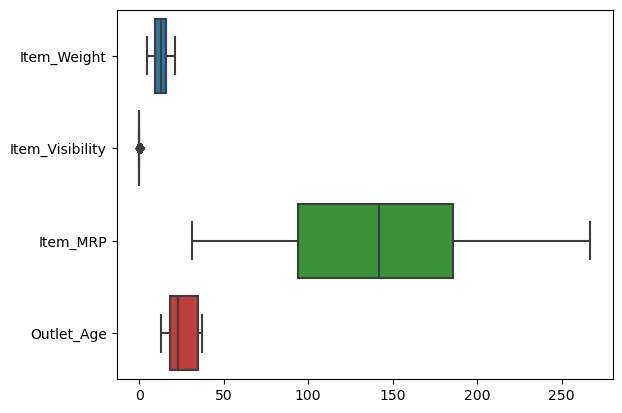

In [51]:
sns.boxplot(numcols,orient='h')

In [52]:
numcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'], dtype='object')

In [53]:
numcols.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
Item_Weight,1.000000,-0.013641,0.033002,-0.000462
Item_Visibility,-0.013641,1.000000,-0.006351,0.083678
Item_MRP,0.033002,-0.006351,1.000000,-0.000141
Outlet_Age,-0.000462,0.083678,-0.000141,1.000000


In [54]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_code'],
      dtype='object')

In [55]:
numcols['Item_Outlet_Sales']=objcols.Item_Outlet_Sales

In [56]:
objcols=objcols.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)

In [57]:
objcols_dummy=pd.get_dummies(objcols)

In [58]:
objcols_dummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [59]:
objcols.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD
3,Regular,Fruits and Vegetables,OUT010,Missing,Tier 3,Grocery Store,FD
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NC


In [60]:
pd.get_dummies

<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'>

In [61]:
objcols_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Item_Fat_Content_Low Fat         14204 non-null  bool 
 1   Item_Fat_Content_Regular         14204 non-null  bool 
 2   Item_Type_Baking Goods           14204 non-null  bool 
 3   Item_Type_Breads                 14204 non-null  bool 
 4   Item_Type_Breakfast              14204 non-null  bool 
 5   Item_Type_Canned                 14204 non-null  bool 
 6   Item_Type_Dairy                  14204 non-null  bool 
 7   Item_Type_Frozen Foods           14204 non-null  bool 
 8   Item_Type_Fruits and Vegetables  14204 non-null  bool 
 9   Item_Type_Hard Drinks            14204 non-null  bool 
 10  Item_Type_Health and Hygiene     14204 non-null  bool 
 11  Item_Type_Household              14204 non-null  bool 
 12  Item_Type_Meat                   14204 non-null  boo

In [62]:
combinedf_clean=pd.concat([numcols,objcols_dummy],axis=1)

In [63]:
combinedf_clean

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,9.30,0.016047,249.8092,23,3735.138,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.92,0.019278,48.2692,13,443.4228,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,17.50,0.016760,141.6180,23,2097.27,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.20,0.000000,182.0950,24,732.38,False,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4,8.93,0.000000,53.8614,35,994.7052,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,25,test,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
5677,7.60,0.142991,169.1448,13,test,False,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5678,10.00,0.073529,118.7440,20,test,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
5679,15.30,0.000000,214.6218,15,test,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False


In [64]:
#split data back to train and test
salestrain_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales!='test']
salestest_df=combinedf_clean[combinedf_clean.Item_Outlet_Sales=='test']

In [65]:
salestrain_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,9.30,0.016047,249.8092,23,3735.138,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.92,0.019278,48.2692,13,443.4228,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,17.50,0.016760,141.6180,23,2097.27,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.20,0.000000,182.0950,24,732.38,False,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4,8.93,0.000000,53.8614,35,994.7052,True,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True


In [66]:
salestest_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,20.750000,0.007565,107.8622,23,test,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,8.300000,0.038428,87.3198,15,test,False,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
2,14.600000,0.099575,241.7538,24,test,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
3,7.315000,0.015388,155.0340,15,test,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
4,12.792854,0.118599,234.2300,37,test,False,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False


In [67]:
salestrain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, 0 to 8522
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Age                       8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   object 
 5   Item_Fat_Content_Low Fat         8523 non-null   bool   
 6   Item_Fat_Content_Regular         8523 non-null   bool   
 7   Item_Type_Baking Goods           8523 non-null   bool   
 8   Item_Type_Breads                 8523 non-null   bool   
 9   Item_Type_Breakfast              8523 non-null   bool   
 10  Item_Type_Canned                 8523 non-null   bool   
 11  Item_Type_Dairy                  8523 non-null   bool   
 12  Item_Type_Frozen Foods   

In [68]:
salestest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, 0 to 5680
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Age                       5681 non-null   int64  
 4   Item_Outlet_Sales                5681 non-null   object 
 5   Item_Fat_Content_Low Fat         5681 non-null   bool   
 6   Item_Fat_Content_Regular         5681 non-null   bool   
 7   Item_Type_Baking Goods           5681 non-null   bool   
 8   Item_Type_Breads                 5681 non-null   bool   
 9   Item_Type_Breakfast              5681 non-null   bool   
 10  Item_Type_Canned                 5681 non-null   bool   
 11  Item_Type_Dairy                  5681 non-null   bool   
 12  Item_Type_Frozen Foods   

In [69]:
#Delete Item_Outlet_sales from salestest_df
salestest_df=salestest_df.drop('Item_Outlet_Sales',axis=1)

In [70]:
salestest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5681 entries, 0 to 5680
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Outlet_Age                       5681 non-null   int64  
 4   Item_Fat_Content_Low Fat         5681 non-null   bool   
 5   Item_Fat_Content_Regular         5681 non-null   bool   
 6   Item_Type_Baking Goods           5681 non-null   bool   
 7   Item_Type_Breads                 5681 non-null   bool   
 8   Item_Type_Breakfast              5681 non-null   bool   
 9   Item_Type_Canned                 5681 non-null   bool   
 10  Item_Type_Dairy                  5681 non-null   bool   
 11  Item_Type_Frozen Foods           5681 non-null   bool   
 12  Item_Type_Fruits and Vege

In [71]:
salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype('float64')

C:\Users\Eswar Aditya\AppData\Local\Temp\ipykernel_20164\560551408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salestrain_df.Item_Outlet_Sales=salestrain_df.Item_Outlet_Sales.astype('float64')


In [72]:
salestrain_df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<Axes: ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

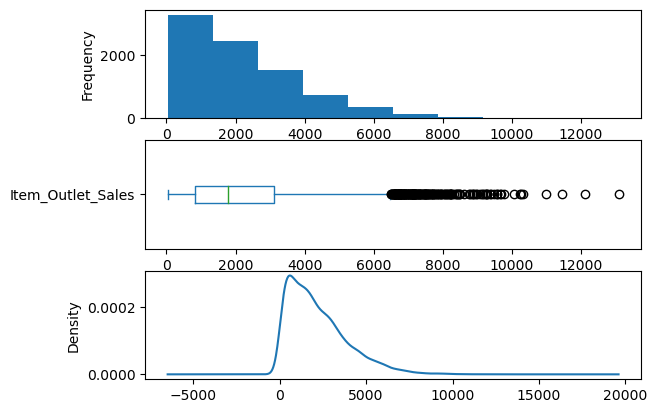

In [73]:
#hitogram,Boxplot,and density curve
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
salestrain_df.Item_Outlet_Sales.plot(kind='hist',ax=ax[0])
salestrain_df.Item_Outlet_Sales.plot(kind='box',vert=False,ax=ax[1])
salestrain_df.Item_Outlet_Sales.plot(kind='kde',ax=ax[2])

<Axes: ylabel='Frequency'>

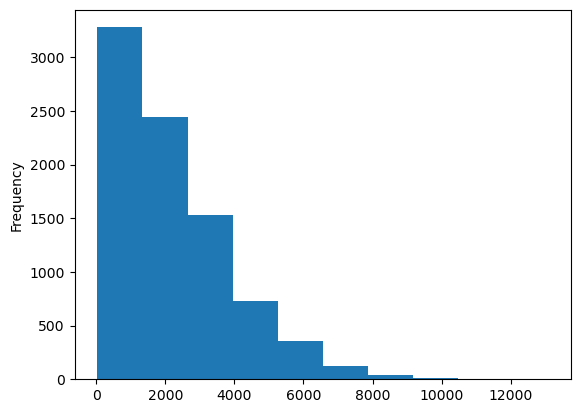

In [74]:
salestrain_df.Item_Outlet_Sales.plot(kind='hist')

<Axes: >

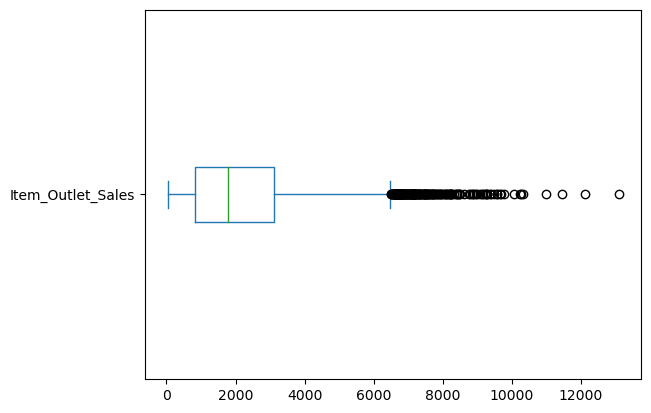

In [75]:
salestrain_df.Item_Outlet_Sales.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

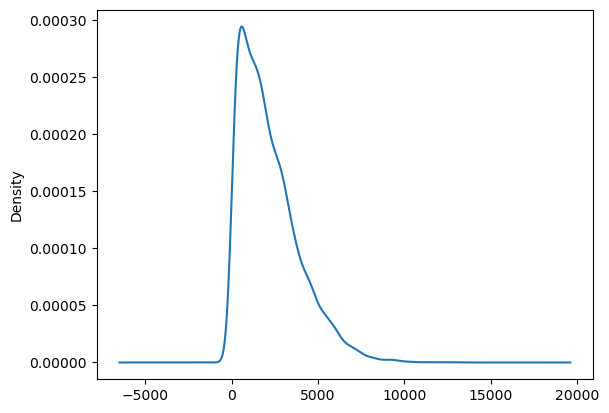

In [76]:
salestrain_df.Item_Outlet_Sales.plot(kind='density')

<Axes: >

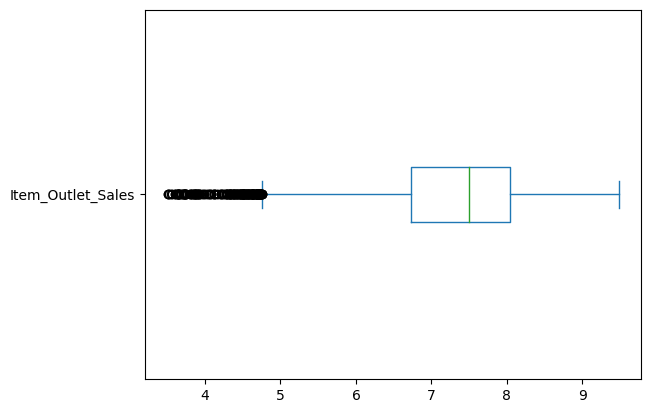

In [77]:
np.log(salestrain_df.Item_Outlet_Sales).plot(kind='box',vert=False)

In [78]:
#spliting data into 2 ways which having dependent and independent variables (split data into dependent variable(y) & independent variables(x's))
y=salestrain_df.Item_Outlet_Sales
x=salestrain_df.drop('Item_Outlet_Sales',axis=1)

In [79]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_code_DR,Item_code_FD,Item_code_NC
0,9.300,0.016047,249.8092,23,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,5.920,0.019278,48.2692,13,False,True,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,17.500,0.016760,141.6180,23,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,19.200,0.000000,182.0950,24,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4,8.930,0.000000,53.8614,35,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,35,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
8519,8.380,0.046982,108.1570,20,False,True,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
8520,10.600,0.035186,85.1224,18,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
8521,7.210,0.145221,103.1332,13,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False


# Linear Regression

In [80]:
#y=y.astype('float64')

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
reg=LinearRegression()

In [83]:
regmodel=reg.fit(x,y)

In [84]:
regmodel.score(x,y)

0.5637737001510252

In [85]:
regtestpredict=regmodel.predict(salestest_df)

In [116]:
regpredict=regmodel.predict(x)

In [117]:
rigresid=y-regpredict

In [118]:
np.sqrt(np.mean(rigresid**2))

1127.0330147429927

In [86]:
#pd.DataFrame(regtestpredict).to_csv('reg.csv')

# Decession Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [260]:
tree=DecisionTreeRegressor(max_depth=8)

In [261]:
treemodel=tree.fit(x,y)

In [262]:
treemodel.score(x,y)

0.6358506446270598

In [263]:
treepredict=treemodel.predict(x)

In [264]:
treeresid=y-treepredict

In [265]:
np.sqrt(np.mean(treeresid**2))

1029.7231777812294

In [255]:
treetestpred=treemodel.predict(salestest_df)

In [256]:
pd.DataFrame(treetestpred).to_csv("tree.csv")

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [393]:
RF=RandomForestRegressor(max_depth=7,n_estimators=5000)

In [394]:
RFmodel=RF.fit(x,y)

In [395]:
RFmodel.score(x,y)

0.6360948399739269

In [396]:
rfpredict=RFmodel.predict(x)

In [397]:
rfresid=y-rfpredict

In [398]:
np.sqrt(np.mean(rfresid**2))

1029.3778582376847

In [399]:
RFtestpredict=RFmodel.predict(salestest_df)

In [400]:
pd.DataFrame(RFtestpredict).to_csv('RF.csv')

# catBoost

In [266]:
from catboost import CatBoostRegressor

In [355]:
cat=CatBoostRegressor(depth=6,iterations=100,learning_rate=0.1)

In [356]:
catmodel=cat.fit(x,y)

0:	learn: 1612.9519680	total: 2.16ms	remaining: 214ms
1:	learn: 1530.1378403	total: 4.24ms	remaining: 208ms
2:	learn: 1461.5576733	total: 6.28ms	remaining: 203ms
3:	learn: 1400.0505098	total: 8.39ms	remaining: 201ms
4:	learn: 1347.6091459	total: 10.5ms	remaining: 200ms
5:	learn: 1304.3015482	total: 12.7ms	remaining: 199ms
6:	learn: 1268.0086668	total: 14.8ms	remaining: 197ms
7:	learn: 1238.3727448	total: 16.9ms	remaining: 194ms
8:	learn: 1210.5338330	total: 18.9ms	remaining: 191ms
9:	learn: 1187.6900831	total: 20.8ms	remaining: 187ms
10:	learn: 1169.1950014	total: 22.9ms	remaining: 185ms
11:	learn: 1152.2082330	total: 24.9ms	remaining: 183ms
12:	learn: 1138.1054759	total: 26.9ms	remaining: 180ms
13:	learn: 1126.8221142	total: 28.8ms	remaining: 177ms
14:	learn: 1117.0147491	total: 30.9ms	remaining: 175ms
15:	learn: 1110.8694416	total: 32.9ms	remaining: 173ms
16:	learn: 1104.1349159	total: 35ms	remaining: 171ms
17:	learn: 1098.3466059	total: 37ms	remaining: 169ms
18:	learn: 1093.2980674	

In [357]:
catmodel.score(x,y)

0.6357119516333795

In [358]:
catpredict=catmodel.predict(x)

In [359]:
catresid=y-catpredict

In [360]:
np.sqrt(np.mean(catresid**2))

1029.919253638844

In [361]:
cattestpredict=catmodel.predict(salestest_df)

In [362]:
pd.DataFrame(cattestpredict).to_csv('cat.csv')